<a href="https://colab.research.google.com/github/bao021600/Developments-in-Kalman-Filtering-with-Applications-in-Finance/blob/main/MLE_BK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def bk(x, theta, alpha, sigma, dt):
  dx=(theta-alpha*x)*dt+sigma*np.random.normal(0,np.sqrt(dt))
  #print(dx)
  return dx

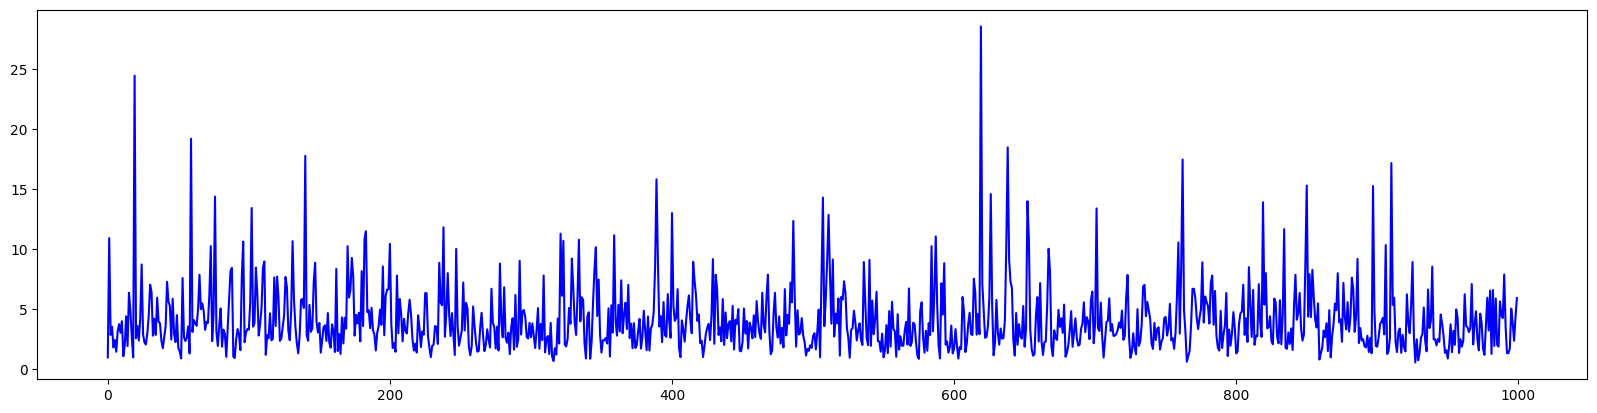

In [48]:
r=1
dt=1
theta=1
alpha=0.8
sigma=0.6

N= 1000

value_list=np.zeros(N)

for i in range(0,N-1):
  #value=bk(r,theta,alpha,sigma,dt)
  #print("round",i+1, "value is", value)
  value_list[i+1]=value_list[i]+bk(value_list[i], theta, alpha, sigma, dt)

#print(value_list)


value_list=np.exp(value_list)

x_axis=range(0,N)
plt.figure().set_figwidth(20)
plt.plot(x_axis, value_list,'b')

#plt.show()

#print("algebric mean is", np.mean(value_list))

In [50]:
X=value_list.copy()

from scipy.optimize import minimize
#  Code our distribution function
def BKK(x1, x2, dt, theta, alpha, sigma):
    #sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2 * mu)
    #sigma0 = np.sqrt( sigma0 )

    prefactor = 1 / (np.sqrt(2 * np.pi * sigma**2 * dt))

    #f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - theta * (1-np.exp(-mu*dt)) )**2 / (2 * sigma0**2) )

    f= prefactor * np.exp(-1/2 *  ((x2 - x1 - (theta - alpha * x1)*dt)**2 /(dt * sigma**2)))
    return f

#  Calculate the negative of the log likelihood
def log_likelihood_BK(p, X, dt):

    theta = p[0]
    alpha = p[1]
    sigma = p[2]

    #N = 1000

    f = np.zeros( (N-1, ) )

    for i in range( 1, N ):
        x2 = np.log(X[i])
        x1 = np.log(X[i-1])

        f[i-1] = BKK(x1, x2, dt, theta, alpha, sigma)

    ind = np.where(f == 0)
    ind = ind[0]
    if ind.size > 0:
        f[ind] = 10**-8

    f = np.log(f)
    f = np.sum(f)

    return -f

#  mu and sigma must be greater than zero.  We use these contraint functions with minimze
def constraint1( p ):
    return p[1]

def constraint2( p ):
    return p[2]

#  Add constraint function to a dictionary
cons = ( {'type':'ineq', 'fun': constraint1},
         {'type':'ineq', 'fun': constraint2} )

#  Initial guess for our parameters
p0 = [0.1, 1, 0.3]

#  Call minimize
min_like=minimize(log_likelihood_BK, p0, args = (X, dt), constraints=cons)


bk_like_list=min_like.x

print("We set original [theta, alpha, sigma] for BK to be " ,[theta, alpha, sigma])

print("MLE [theta, alpha, sigma] for BK is ", bk_like_list)

We set original [theta, alpha, sigma] for BK to be  [1, 0.8, 0.6]
MLE [theta, alpha, sigma] for BK is  [0.99198436 0.80066144 0.58741108]


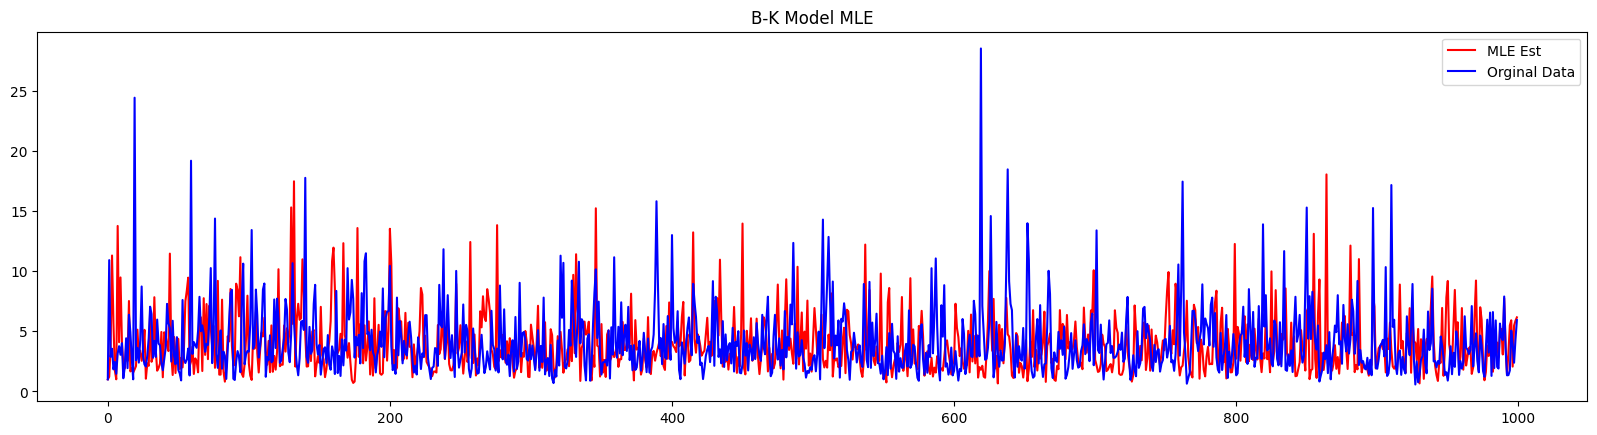

'\nerror_list=[]\nfor i in range(len(new_value_list)):\n  error_list.append(abs(new_value_list[i]-value_list[i]))\nplt.plot(x_axis, error_list)\nplt.show()\n'

In [51]:
r=1
dt=1
theta=bk_like_list[0]
alpha=bk_like_list[1]
sigma=bk_like_list[2]
new_value_list=np.zeros(N)
for i in range(0,N-1):
  new_value=bk(r,theta,alpha,sigma,dt)
  #print("round",i+1, "value is", value)
  new_value_list[i+1]=new_value_list[i]+bk(new_value_list[i], theta, alpha, sigma, dt)

new_value_list=np.exp(new_value_list)

#print(value_list)
x_axis=range(0,N)
plt.figure().set_figwidth(20)

plt.plot(x_axis, new_value_list,'r',label="MLE Est")
plt.plot(x_axis, value_list,'b',label="Orginal Data") #original values
plt.title("B-K Model MLE")
plt.legend()
plt.show()

'''
error_list=[]
for i in range(len(new_value_list)):
  error_list.append(abs(new_value_list[i]-value_list[i]))
plt.plot(x_axis, error_list)
plt.show()
'''